# Prezzare le opzioni call e put attraverso una simulazione Montecarlo e breve compendio teorico di riferimento

<div style="text-align: right">Giorgio Bella - 2 dicembre 2022</div>

## Tassi d'interesse

Il tasso d'interesse permette di determinare la variazione che subisce un capitale investito al tempo $T$ in un tempo successivo $T+\Delta T$.

Ad esempio, quando una banca presta del denaro ad un cliente viene fissato un tasso attraverso il quale l'importo oggetto del finanziamento viene rivalutato periodicamente finché il debito non viene estinto dal contraente.
O ancora, se un investitore decide di comprare dei titoli di stato, è dichiarato un tasso che consente di determinare, a scadenza dell'investimento, quale sarà l'importo spettante.

In tutti questi esempi la sola dichiarazione del tasso d'interesse creerebbe ambiguità, perché il suo significato dipende dal modo in cui il tasso d'interesse viene misurato.

Supponendo, ad esempio, che gli interessi vengano calcolati una volta all'anno, l'investimento del capitale $C = 100€$ ad un tasso del $i=10\%$, frutta dopo un anno il montante $M$:

$$M=C\cdot(1+i)=100€\cdot1.1=110€$$

Se gli interessi venissero però capitalizzati due volte all'anno, ipotizzando di tenere fissa la durata dell'investimento ad un anno, ogni 6 mesi andrebbe applicato $i'=\frac{10\%}{2}=5\%$, costituendo quindi un montante pari a:

$$M=C\cdot(1+i')\cdot(1+i')=C\cdot(1+1')^2=100\cdot1.05^2=110.25€$$

Per analogia, se gli interessi venissero capitalizzati $m$ volte all'anno, si otterrebbe:

$$M=C\cdot\left(1+\frac{i}{m}\right)^m$$

Se l'investimento si protraesse per $n$ anni, considerano una capitalizzazione $m$ volte all'anno, si avrebbe un montate pari a:

$$M=C\cdot\left(1+\frac{i}{m}\right)^{m\cdot n}$$

Risulta evidente che se la capitalizzazione degli interessi avvenisse nel continuo si avrebbe:

$$M = \lim_{m\to +\infty}C\cdot\left(1+\frac{i}{m}\right)^{m \cdot n} = C\cdot e^{i \cdot n}$$

Questo caso approssima molto bene il caso di una capitalizzazione applicata ogni giorno dell'anno e quindi questa formulazione viene largamente utilizzata per praticità di calcolo.

Invertendo l'espressione, è possibile calcolare il valore attuale di un importo futuro. Nel caso nella capitalizzazione applicata $m$ volte all'anno per $n$ anni si ha:

$$A=M\cdot\left(1+\frac{i}{m}\right)^{-m\cdot n}$$

E nel continuo:

$$A=M\cdot e^{-i \cdot n}$$

Nel caso specifico del problema di _Option Pricing_, questa espressione è utile perché la determinazione del prezzo del contratto derivato acquistato oggi è di fatto calcolato come il valore attuale del possibile profitto futuro.

## Contratti derivati: le opzioni

Le opzioni sono strumenti finanziari il cui valore non è autonomo ma deriva dal prezzo di una attività sottostante di varia natura (reale come nel caso di materie prime quali grano, oro, petrolio, ecc. , oppure finanziaria come nel caso di azioni, obbligazioni, tassi di cambio, indici, ecc.). Il termine “derivato” indica questa dipendenza.

Possiamo quindi definire le opzioni come dei contratti finanziari che danno il diritto, ma non l’obbligo, all’acquirente dietro il pagamento di un prezzo (premio), di esercitare o meno la facoltà di acquistare (Call) o vendere (Put) una data quantità di una determinata attività finanziaria, detta sottostante, a una determinata data di scadenza o entro tale data e a un determinato prezzo di esercizio (strike price).

Con l'acquisto di opzioni call ci si tutela perciò dal rischio che il valore del sottostante cresca oltre la propria soglia di accettazione, mentre con l'acquisto di opzioni put che scenda al costo del premio pagato per l'acquisto dello strumento.

In sintesi:

* Nel caso dell'acquisto di opzioni call, lo strumento garantisce un profitto linearmente crescente al crescere del prezzo del sottostante a scadenza oltre lo strike price concordato (perché permette di acquistare il sottostante ad un prezzo inferiore a quello di mercato e rivenderlo immediatamente a prezzo più alto).
* Nel caso di acquisto di opzioni put, secondo un profitto linearmente crescente al decrescere del prezzo del sottostante al di sotto dello strike price concordato (perché permette di vendere istantaneamente a prezzo più alto il sottostante acquistabile a prezzo inferiore).

In entrambi casi di dice che il contratto è _in the money_ quando il valore del sottostante rende conveniente esercitare il diritto di opzione perché il suo valore è superiore (nel caso di acquisto di opzione call) o inferiore (nel caso di acquisto di opzione put) allo strike price concordato.

E' anche possibile vendere (spesso riferito come "scrivere" contratti, se ci si mette nei panni dell'intermediario) opzioni put e call. In questo caso, chi vende l'opzione incassa subito il potenziale profitto e si espone ad una potenziale perdita futura per compensare la controparte qualora il contratto risulti _in the money_ per l'acquirente.

Per comprendere il funzionamento di questi strumenti seguono alcuni esempi.

### Acquisto di opzioni call
Ipotizziamo di voler acquistare un _opzione call_ su un titolo $\alpha$ a mercato. Il nostro intermediario espone la seguente tabella:

![Call option price table](Assets/call_price.png)

Per ogni scadenza desiderata (giugno, settembre, dicembre, etc.) sono presenti le quotazioni per acquistare ("offer" in tabella o "denaro" in italiano) e per vendere ("bid" o "lettera" in italiano) in funzione dello strike price desiderato per la scadenza scelta.

I prezzi listati si riferiscono ad opzioni di acquisto di una singola azione del relativo sottostante $\alpha$.

Ad esempio, se si desidera comprare il diritto di acquistare 100 azioni del sottostante $\alpha$ al prezzo di $880\$$ a dicembre, dovremo pagare $100 \cdot 56.30\$=5600\$$ all'intermediario per acquistare la relativa opzione con queste caratteristiche.

A dicembre sono possibili due scenari:
1. il prezzo del sottostante $\alpha$ non ha superato il valore di $880\$$ per azione, quindi l'opzione non ha ragione di essere esercitata e l'investitore realizzerà una perdita pari al costo del derivato acquistato ($5600\$$)
2. il prezzo del sottostante $\alpha$ ha superato il valore di $880\$$ per azione, quindi l'opzione di acquisto viene esercitata e si ha il diritto di acquistare 100 azioni di $\alpha$ per un valore, lo _strike price_, inferiore a quello di mercato. Questo comporterà un profitto se la differenza tra il prezzo del sottostante e lo _strike price_ è tale da coprire il costo sostenuto per l'acquisto nell'opzione. Nel nostro caso, se l'azione $\alpha$ ha un valore a scadenza $\geq 880 + 56.30 = 936.30$ l'investitore ottiene un profitto.

Ipotizzando, ad esempio, che il valore dell'azione $\alpha$ a scadenza sia pari a $940\$$, l'investitore realizzerebbe:

$$- 5600\$ - 880\$ \cdot 100 + 940\$ \cdot 100 = - 5600\$ - 88000\$ + 94000\$ = 400\$$$

L'addizione considera l'uscita di $5600\$$ per l'acquisto dell'opzione, l'uscita di $88000\$$ per l'acquisto delle azioni come da esercizio del diritto garantito dall'opzione e l'entrata di $94000\$$ frutto della vendita a mercato delle azioni appena acquistate.

Nel grafico a seguire una rappresentazione visuale del profitto dell'investitore in funzione della variazione di prezzo del sottostante.

![Call option payoff](Assets/buy_call_payoff.png)

### Acquisto di opzioni put
Nel caso di acquisto un _opzione put_ sul medesimo titolo $\alpha$ a mercato, il nostro intermediario espone la seguente tabella:

![Put option price table](Assets/put_price.png)

Per ogni scadenza desiderata (giugno, settembre, dicembre, etc.) sono presenti le quotazioni per acquistare ("offer" in tabella o "denaro" in italiano) e per vendere ("bid" o "lettera" in italiano) in funzione dello strike price desiderato per la scadenza scelta.

I prezzi listati si riferiscono ad opzioni di vendita di una singola azione del relativo sottostante $\alpha$.

Ad esempio, se si desidera acquistare il diritto a vendere 100 azioni del sottostante $\alpha$ al prezzo di $860\$$ a giugno, dovremo pagare $100 \cdot 14.80\$=1480\$$ all'intermediario per acquistare la relativa opzione con queste caratteristiche.

A giugno sono possibili due scenari:
1. il prezzo del sottostante $\alpha$ ha superato il valore di $860\$$ per azione, quindi l'opzione non ha ragione di essere esercitata e l'investitore realizzerà una perdita pari al costo del derivato acquistato ($1480\$$);
2. il prezzo del sottostante $\alpha$ non ha superato il valore di $860\$$ per azione, quindi l'opzione di acquisto viene esercitata e si ha il diritto di vendere 100 azioni di $\alpha$ per un valore, lo _strike price_, superiore a quello di mercato. Questo comporterà un profitto se la differenza tra lo _strike price_ e il prezzo del sottostante è tale da coprire il costo sostenuto per l'acquisto nell'opzione. Nel nostro caso, se l'azione $\alpha$ ha un valore a scadenza $\leq 860 - 14.80 = 845.20$ l'investitore ottiene un profitto.

Ipotizzando, ad esempio, che il valore dell'azione $\alpha$ a scadenza sia pari a $820\$$, l'investitore realizzerebbe:

$$- 1480\$ - 820\$ \cdot 100 + 860\$ \cdot 100 = - 1480\$ - 82000\$ + 86000\$ = 2520\$$$

L'addizione considera l'uscita di $1480\$$ per l'acquisto dell'opzione, l'uscita di $82000\$$ per l'acquisto delle azioni sul mercato alla data di scadenza e l'entrata di $94000\$$ frutto della vendita immediata delle azioni appena acquistate come da esercizio del diritto garantito dall'opzione.

Nel grafico a seguire una rappresentazione visuale del profitto dell'investitore in funzione della variazione di prezzo del sottostante.

![Put option payoff](Assets/buy_put_payoff.png)

### Vendita (scrittura) di opzioni
Nel caso di vendita (scrittura) di un _opzione put_ sul medesimo titolo $\alpha$ a mercato, il nostro intermediario espone la seguente tabella:

![Put option price table](Assets/put_price.png)

Per ogni scadenza desiderata (giugno, settembre, dicembre, etc.) sono presenti le quotazioni per acquistare ("offer" in tabella o "denaro" in italiano) e per vendere ("bid" o "lettera" in italiano) in funzione dello strike price desiderato per la scadenza scelta.

I prezzi listati si riferiscono ad opzioni di vendita di una singola azione del relativo sottostante $\alpha$.

Ad esempio, se si desidera vendere il diritto di vendere 100 azioni del sottostante $\alpha$ al prezzo di $840\$$ a settembre, incasseremo subito $100 \cdot 31.00\$=3100\$$ per vendere la relativa opzione con queste caratteristiche da un certo acquirente.

A settembre sono possibili due scenari:
1. il prezzo del sottostante $\alpha$ ha superato il valore di $840\$$ per azione, quindi l'opzione non ha ragione di essere esercitata da parte del nostro acquirente e il denaro incassato inizialmente ($3100\$$) dal venditore è di fatto il profitto dell'operazione;
2. il prezzo del sottostante $\alpha$ è sceso al di sotto del valore di $840\$$ per azione, quindi l'opzione di acquisto viene esercitata dall'acquirente che avrà il diritto di acquistare 100 azioni di $\alpha$ per un valore, lo _strike price_, inferiore a quello di mercato. Questo comporterà una perdita per il venditore che dovrà coprire la differenza tra il prezzo del sottostante e lo _strike price_.

Ipotizzando, ad esempio, che il valore dell'azione $\alpha$ a scadenza sia pari a $800\$$, il venditore realizzerebbe la seguente perdita:

$$- 5600\$ - (840\$ - 800\$) \cdot 100 = - 5600\$ - 88000\$ + 94000\$ = 400\$$$

L'addizione considera l'entrata di $3100\$$ per l'acquisto dell'opzione, l'uscita di $4000\$$ per garantire all'acquirente l'esercizio dell'opzione di vendita di 100 azioni $\alpha$ al prezzo di $840\$$ l'una come concordato dal contratto di opzione, sebbene a mercato il titolo sia scambiato a $800\$$ ad azione.

Nel grafico a seguire una rappresentazione visuale del profitto del venditore dell'opzione put in funzione della variazione di prezzo del sottostante.

![Put option payoff](Assets/sell_put_payoff.png)

## Prezzare le opzioni attraverso simulazione Montecarlo
Al fine di prezzare un'_opzione call_ o un'_opzione put_ emessa su un certo sottostante è necessario simulare l'evoluzione di prezzo del sottostante stesso giorno per giorno, calcolare il profitto atteso a data di scadenza e attualizzare quel valore ad oggi per determinare il prezzo del contratto.

Per simulare l'evoluzione nel tempo del prezzo del sottostante si utilizzia comunemente un moto browniano geometrico discreto, dove $S_{t+dt}$ rappresenta il prezzo del sottostante al tempo $t+dt$, calcolato in funzione del prezzo dello stesso al tempo $t$ (es. al giorno precedente se $dt=$1 giorno):

$$S_{t+dt} = S_t \cdot e^{(d+a \cdot X)}$$

$X$ è una normale standard, $a = \sigma \cdot \sqrt{dt}$ e $d$ è definito come il _drift_ del moto browniano: $d=\left(\mu-\frac{\sigma^2}{2}\right)\cdot dt$.

Nell'espressione, $dt$ rappresenta l'intervallo di tempo su cui avviene l'evoluzione del prezzo.

Per come è costruita, la variabile casuale $\ln\left(\frac{S_{t+1}}{S_{t}}\right)$ (equivalente al log-return della serie) ha distribuzione normale con valore atteso $\left(\mu-\frac{\sigma^2}{2}\right)$ e varainza $\sigma^2 \cdot dt$

Per la finalità dell'esempio, definiamo i parametri del sottostante arbitariarmente:

In [1]:
S = 100 # prezzo spot del sottostante
mu = 0.07 # log return del sottostante di riferimento
sigma = 0.2 #volatilità del sottostante

Per considerare i parametri di un titolo realmente presente sul mercato, bisogna utilizzare come <code>S</code> il prezzo a cui il titolo è attualmente scambiato, come <code>mu</code> il valore medio dei log-returns dei prezzi del titolo su un certo intervallo di tempo, come <code>sigma</code> la deviazione standard dei log-returns dei prezzi del titolo sul medesimo intervallo di tempo.

Ad esempio, se il sottostante fosse il titolo azionario _Starbucks_, per ottenere <code>S</code>, <code>mu</code> e <code>sigma</code> aggiornati si potrebbe eseguire la seguente cella (opzionale):

In [2]:
# Opzionale: eseguire solo se si preferisce utilizzare i dati reali di un titolo

# Import delle ibrerie necessarie
import pandas as pd
import numpy as np
from datetime import datetime
import yfinance as yf

# Definizione dell'intervallo di tempo
start_date = '2021-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# Scelta del titolo
ticker = 'SBUX'

# Download dei prezzi del titolo nell'intervallo di tempo scelto
data = yf.download(ticker, start_date, end_date, progress=False)

# Calcolo dei log-return sui prezzi di chiusura: ln(P_t/P_(t-1))
data['Log Returns'] = np.log(data['Adj Close']) - np.log(data['Adj Close'].shift(1))

# Parametri del sottostante
S = data['Adj Close'][-1] # ultimo prezzo del sottostante
mu = np.mean(data['Log Returns'])
sigma = np.std(data['Log Returns'])

print('Parametri del sottostante per il titolo ' + ticker + ': \n\n S = '
      + str(S) +'\n mu = ' + str(mu) + '\n sigma = ' + str(sigma))

Parametri del sottostante per il titolo SBUX: 

 S = 99.19999694824219
 mu = 2.634273195681247e-06
 sigma = 0.01872751161428417


Parametri del contratto di opzone sul sottostante:

In [3]:
T = 1 # tempo alla scadenza (in anni)
K = 100 # strike price

Parametri della simulazione:

In [4]:
Nsimulations = 5000
Nsteps = 250 # numero di giorni in cui il mercato è aperto nell'anno

Calcolo degli scalari presenti nella serie $S_{t+dt}$

In [5]:
import numpy as np

dt = T/Nsteps
drift = (mu-(sigma**2)/2)*dt
a = sigma*np.sqrt(dt)

Generiamo <code>Nsteps</code> estrazioni casuali da una normale standard (una per ciascuno step evolutivo del prezzo) e ripetiamo il processo per <code>Nsimulations</code> volte:

In [6]:
x = np.random.normal(0,1,(Nsimulations,Nsteps))
x

array([[ 0.06365704, -1.88652196, -0.11496844, ..., -0.30513544,
        -0.79302438,  0.23557526],
       [-1.02174554,  0.72773212, -0.49857426, ...,  0.63178717,
        -0.182288  ,  0.98796052],
       [ 1.08349912, -0.97017654, -0.43405005, ...,  0.10863915,
        -0.53514673,  2.22058649],
       ...,
       [-1.61577496, -1.70106006, -0.04527661, ...,  0.68804565,
        -0.8099961 , -1.20000937],
       [ 1.93893185, -0.7821445 , -0.35155186, ...,  1.95041229,
         1.19739737, -1.10490602],
       [ 1.19527951, -0.35520024,  0.73412767, ..., -0.37073123,
         0.80646689, -0.66545794]])

L'operazione di generazione di estrazioni casuali da una normale è alla radice della determinazione dell'insieme dei possibili scenari di evoluzione di prezzo del sottostante.

Calcolimo iterativamente tutti i $S_{t+dt}$ steps (colonne) per ogni simulazione (righe):

In [7]:
Smat = np.zeros((Nsimulations,Nsteps))
Smat[:,0] += S

for i in range(1,Nsteps):
    Smat[:,i] += Smat [:,i-1]*np.exp(drift + a*x[:,i])
Smat

array([[ 99.19999695,  98.97851793,  98.96497234, ...,  99.97366857,
         99.87974005,  99.90754364],
       [ 99.19999695,  99.28547056,  99.22678854, ...,  96.66850289,
         96.64756689,  96.7606605 ],
       [ 99.19999695,  99.08600245,  99.03500674, ..., 100.3864559 ,
        100.32277731, 100.5869174 ],
       ...,
       [ 99.19999695,  99.00026263,  98.99488528, ...,  99.90718293,
         99.81131046,  99.66947763],
       [ 99.19999695,  99.10807246,  99.06674508, ...,  98.51013068,
         98.64987221,  98.52078689],
       [ 99.19999695,  99.15820274,  99.24439212, ...,  97.59665757,
         97.68985944,  97.6128242 ]])

Abbiamo così simulato <code>Nsimulations</code> possibili traiettorie evolutive del prezzo del sottostante, visivalmente:

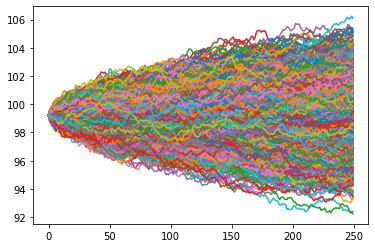

In [8]:
import matplotlib.pyplot as plt
for i in range(Nsimulations):
    plt.plot(Smat[i,:])

Calcoliamo il potenziale payoff di un'_opzione call_ per ciascuna simulazione e il payoff medio di tutte le simulazioni.

In [9]:
q = Smat[:,-1]-K # payoff opzione call per ogni simulazione
for i in range(len(q)): # escludiamo payoff negativi che implicano payoff = 0 
    if q[i]<0:
        q[i]=0
    else:
        q[i]=q[i]
 
payoff_call = np.mean(q) # payoff medio considerando tutte le simulazioni

Calcoliamo il potenziale payoff di un'_opzione put_ per ciascuna simulazione e il payoff medio di tutte le simulazioni.

In [10]:
p = K-Smat[:,-1] # payoff opzione put per ogni simulazione
for i in range(len(p)): # escludiamo payoff negativi che implicano payoff = 0
    if p[i]<0:
        p[i]=0
    else:
        p[i]=p[i]

payoff_put = np.mean(p) # payoff medio considerando tutte le simulazioni

Attualizzando il payoff medio per le due opzioni si ottengono i relativi prezzi ad oggi. Per effettuare l'attualizzazione possiamo utilizzare l'ipotesi di una capitalizzazione continua se il sottostante è negoziato quotidianamente:

In [11]:
call = payoff_call*np.exp(-mu*T)
put = payoff_put*np.exp(-mu*T)

In [12]:
print("Prezzo di acquisto opzione call: " + str(call))
print("Prezzo di acquisto opzione put: " + str(put))

Prezzo di acquisto opzione call: 0.412428814277895
Prezzo di acquisto opzione put: 1.2282117834719752


Fonti:
* _Options, Futures, and Other Derivatives_, John C. Hull - Pearson (2021)
* Borsa Italiana